In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:\Automobile Insurance - Copy.csv")

df = df.drop(columns = ["FIELD11", "FIELD12"], errors = "ignore")

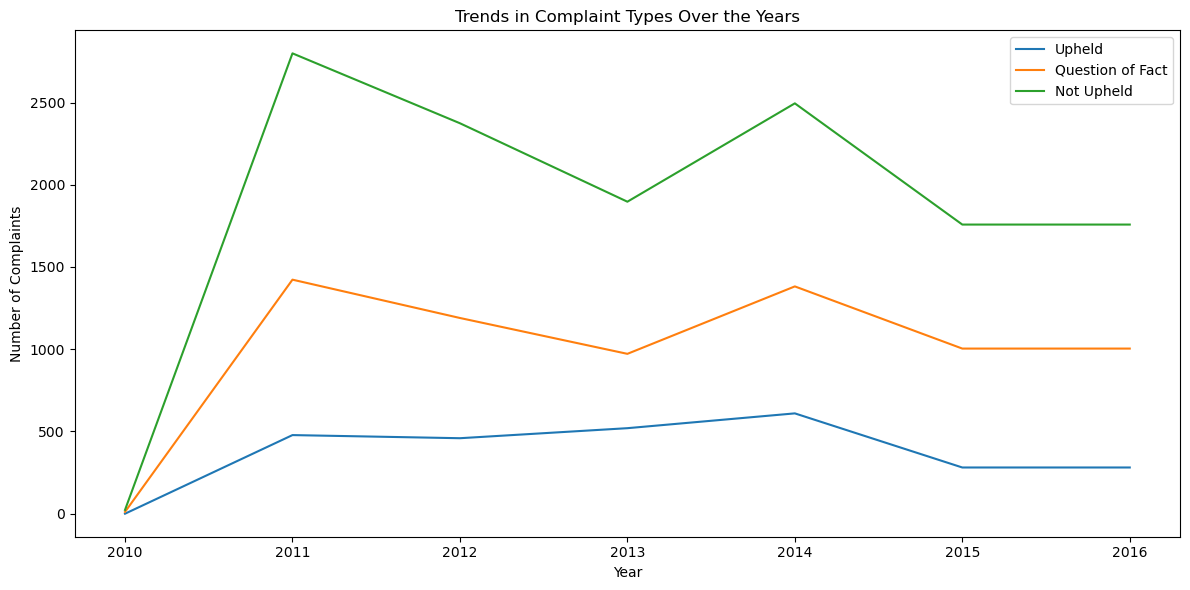

In [7]:
complaints_by_year = df.groupby("Filing_Year")[[
    "Upheld_Complaints", "Question_of_Fact_Complaints", "Not_Upheld_Complaints"
]].sum().reset_index()

plt.figure(figsize = (12, 6))

sns.lineplot(data = complaints_by_year, x = "Filing_Year", y = "Upheld_Complaints", label = "Upheld")

sns.lineplot(data = complaints_by_year, x = "Filing_Year", y = "Question_of_Fact_Complaints", label = "Question of Fact")

sns.lineplot(data = complaints_by_year, x = "Filing_Year", y = "Not_Upheld_Complaints", label = "Not Upheld")

plt.title("Trends in Complaint Types Over the Years")

plt.xlabel("Year")

plt.ylabel("Number of Complaints")

plt.legend()

plt.tight_layout()

plt.show()

In [8]:
complaint_summary = df.groupby("Company_Name").agg({
    "Ratio" : "mean",
    "Total_Complaints" : "sum",
    "Premiums_Written" : "sum"
}).reset_index()

top_complaints = complaint_summary.sort_values(by = "Ratio", ascending = False).head(10)

print(top_complaints[["Company_Name", "Ratio", "Total_Complaints", "Premiums_Written"]])

                                          Company_Name        Ratio  \
129                    New Hampshire Insurance Company  1364.877200   
121  National Union Fire Insurance Company of Pitts...    15.201400   
160                  Sentry Insurance A Mutual Company    14.965100   
3                       21st Century Insurance Company    12.373000   
109                        Meritplan Insurance Company     7.414400   
118              National Interstate Insurance Company     7.063600   
181                   Twin City Fire Insurance Company     6.606967   
106                 Merchants Mutual Insurance Company     5.627167   
95                         Kingstone Insurance Company     5.104300   
136                         Peerless Insurance Company     3.676117   

     Total_Complaints  Premiums_Written  
129                10             0.004  
121                 4             0.132  
160                 1             0.067  
3                  20             0.495  
109     

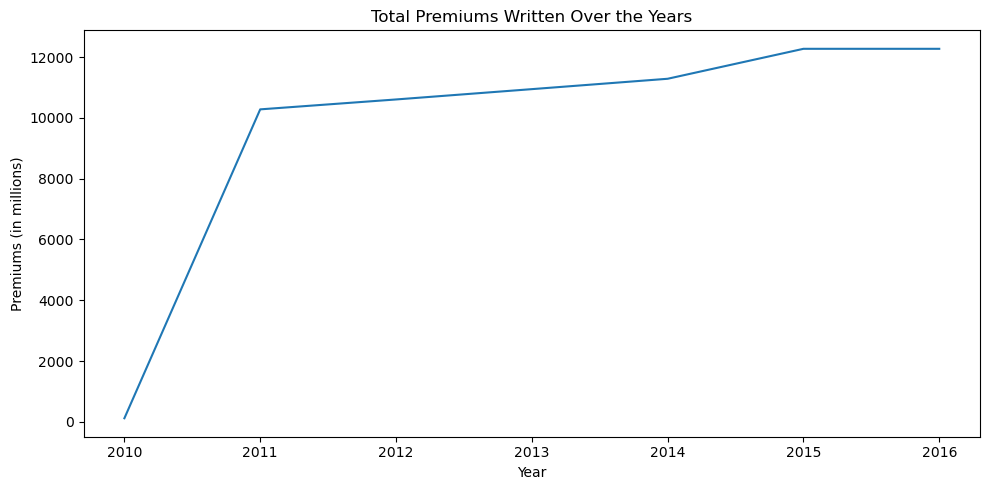

In [12]:
premiums_by_year = df.groupby("Filing_Year")["Premiums_Written"].sum().reset_index()

plt.figure(figsize = (10, 5))

sns.lineplot(data = premiums_by_year, x = "Filing_Year", y = "Premiums_Written")

plt.title("Total Premiums Written Over the Years")

plt.xlabel("Year")

plt.ylabel("Premiums (in millions)")

plt.tight_layout()

plt.show()

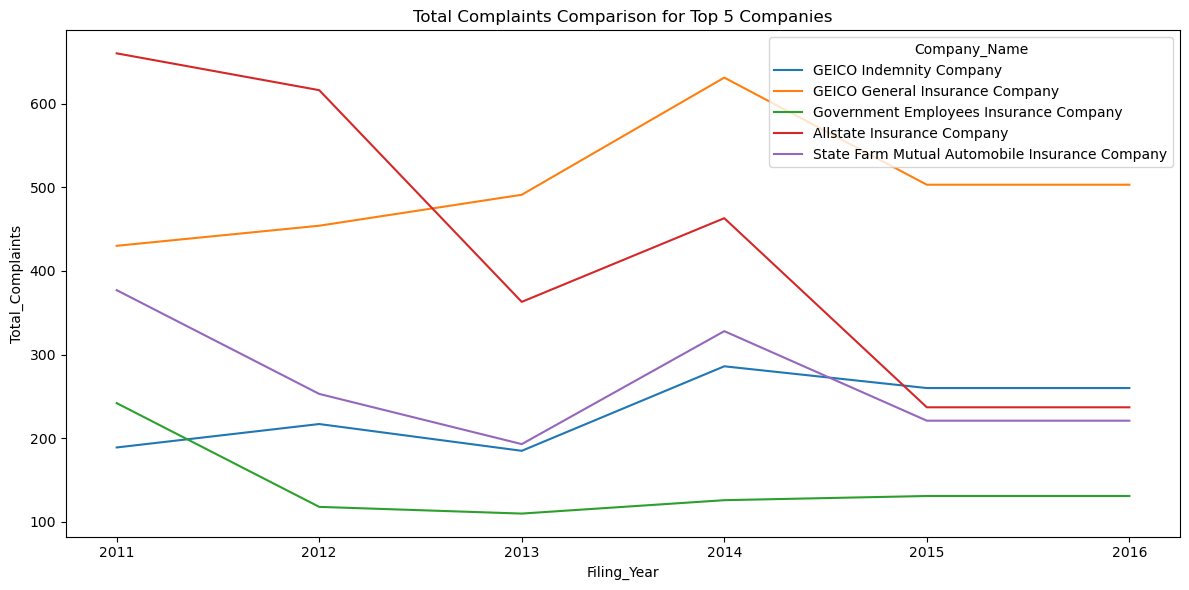

ValueError: Could not interpret value `Complaint_Name` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [18]:
top5_companies = df.groupby("Company_Name")["Premiums_Written"].sum().sort_values(ascending = False).head(5).index
dashboard_df = df[df["Company_Name"].isin(top5_companies)]
                  
# Plot Complaints vs Year for top 5
plt.figure(figsize = (12, 6))
           
sns.lineplot(data = dashboard_df, x = "Filing_Year", y = "Total_Complaints", hue = "Company_Name")
    
plt.title("Total Complaints Comparison for Top 5 Companies")
           
plt.tight_layout()
           
plt.show()
           
# Plot Premiums
plt.figure(figsize = (12, 6))

sns.lineplot(data = dashboard_df, x = "Filing_Year", y = "Premiums_Written", hue = "Complaint_Name")
           
plt.title("Premiums Written Comparison for Top 5 Companies")
           
plt.tight_layout()
        
plt.show()